In [1]:
import torch
import numpy as np
import os
import sys
import cv2
from matplotlib import pyplot as plt

sys.path.append(os.path.join(os.path.dirname('.'), '../pyunet/pyunet'))

from lib.unet import UNet

In [2]:
model_file = "/home/ralampay/workspace/pyunet/models/camvid.pth"
test_image_file = "/home/ralampay/Pictures/CamVid/test/0006R0_f00990.png"
device = "cuda:0"

In [3]:
state = torch.load(model_file)
saved_params = state['params']

img_width = saved_params['img_width']
img_height = saved_params['img_height']
dim = (img_width, img_height)
print(dim)

in_channels = saved_params.get('in_channels')
out_channels = saved_params.get('out_channels')
features = saved_params.get('features')

(128, 128)


In [4]:
model = UNet(
    in_channels=in_channels,
    out_channels=out_channels,
    features=features
).to(device)

model.load_state_dict(state['state_dict'])

<All keys matched successfully>

(128, 128, 3)


/tmp/ipykernel_111372/4080431117.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  x = torch.tensor([x.numpy()]).to(device)


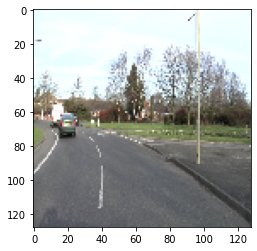

In [5]:
# Load the image
test_image = cv2.resize(cv2.imread(test_image_file), dim)
x = torch.Tensor((test_image / 255).transpose((2, 0, 1)))
x = torch.tensor([x.numpy()]).to(device)
rgb_img = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB) # this converts it into RGB

print(rgb_img.shape)
plt.imshow(rgb_img)
plt.show()

torch.Size([1, 32, 128, 128])


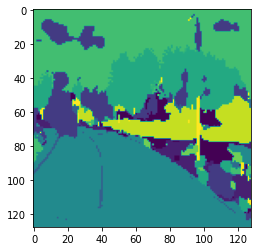

In [6]:
predictions = model.forward(x)
print(predictions.shape)
predictions = torch.argmax(predictions, 1).detach().cpu().numpy()
predictions = np.transpose(predictions, (1, 2, 0))
plt.imshow(predictions)
plt.show()